In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [2]:
df.shape

(2000, 11)

In [3]:
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [4]:
list(df)
df.value_counts()


ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0         0         0        0         0       0       0        0         0          0        0           421
1         0         0        0         0       0       0        0         0          0        0           136
0         0         1        0         0       0       0        0         0          0        0           133
                    0        1         0       0       0        0         0          0        0            67
                             0         0       0       0        0         0          0        1            58
                                                                                                         ... 
1         0         1        1         1       1       0        0         1          1        1             1
0         0         1        1         1       1       1        0         0          0        0             1
1         0      

In [5]:
df.values[0]


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [6]:
df.values[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
str(df.values[0])
df["CookBks"].value_counts()


0    1138
1     862
Name: CookBks, dtype: int64

In [8]:
df["ChildBks"].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

c:\python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


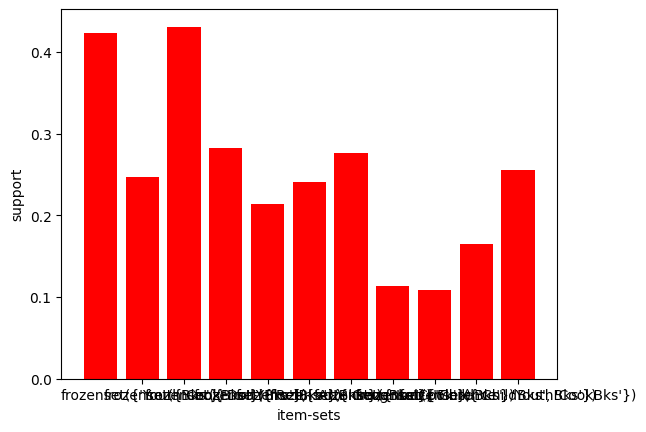

In [9]:
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(0,11)),height = frequent_itemsets.support[0:11],color='red')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets'),plt.ylabel('support')
plt.show()

In [10]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,0.609543


In [11]:
rules.to_csv("rules.csv")

In [12]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [13]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
52,(GeogBks),(ItalCook),0.2760,0.1135,0.0640,0.231884,2.043031,0.032674,1.154123,0.705154
30,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355
210,"(GeogBks, ArtBks)",(YouthBks),0.1275,0.2475,0.0650,0.509804,2.059814,0.033444,1.535100,0.589707
34,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
...,...,...,...,...,...,...,...,...,...,...
126,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673,0.629937
36,(RefBks),(DoItYBks),0.2145,0.2820,0.1055,0.491841,1.744119,0.045011,1.412945,0.543150
84,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
120,"(ChildBks, ArtBks)",(DoItYBks),0.1625,0.2820,0.0950,0.584615,2.073104,0.049175,1.728519,0.618068


In [14]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
258,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778,0.797746
34,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
108,"(ChildBks, ItalCook)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf,0.621858
288,"(RefBks, ArtBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576,0.618118
144,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
138,"(ChildBks, RefBks)",(GeogBks),0.1515,0.2760,0.0940,0.620462,2.248051,0.052186,1.907583,0.654296
252,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
150,"(ChildBks, ItalCook)",(GeogBks),0.0850,0.2760,0.0525,0.617647,2.237852,0.029040,1.893538,0.604528
186,"(RefBks, DoItYBks)",(YouthBks),0.1055,0.2475,0.0580,0.549763,2.221265,0.031889,1.671342,0.614652
66,"(ChildBks, RefBks)",(YouthBks),0.1515,0.2475,0.0830,0.547855,2.213555,0.045504,1.664288,0.646126
